In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import scipy as sp
import numpy as np

In [2]:
signal = np.array([255, 253, 247, 236, 221, 203, 183, 162, 141, 122, 106, 94, 86, 82, 84, 91, 103, 118, 136, 156, 176, 196, 214, 229, 240, 247, 248, 244, 235, 222, 205, 186, 164, 143, 122, 103, 88, 77, 70, 68, 71, 80, 92, 108, 127, 147, 167, 185, 202, 215, 224, 228, 226, 220, 209, 194, 176, 155, 133, 111, 91, 73, 59, 49, 44, 44, 49, 59, 73, 90, 109, 129, 148, 166, 181, 193, 199, 201, 198, 190, 177, 161, 141, 120, 98, 77, 57, 41, 28, 21, 18, 20, 27, 39, 55, 73, 93, 113, 132, 149, 163, 173, 178, 178, 174, 164, 150, 132, 112, 91, 70, 50, 32, 17, 7, 2, 2, 6, 16, 30, 47, 67, 87, 108, 127, 144, 157, 165, 169, 168, 162, 151, 136, 118, 98, 77, 57, 38, 22, 10, 2, 0, 2, 9, 22, 37, 56, 77, 99, 119, 138, 154, 166, 174, 176, 173, 166, 154, 138, 120, 100, 80, 60, 43, 29, 20, 14, 14, 19, 29, 43, 61, 82, 103, 125, 146, 164, 179, 189, 195, 196, 192, 183, 170, 153, 135, 115, 95, 77, 61, 49, 41, 38, 40, 48, 60, 76, 95, 116, 138, 159, 179, 196, 210, 219, 223, 221, 215, 205, 190, 172, 153, 133, 114, 96, 82, 71, 65, 64, 68, 77, 91, 108, 128, 149, 171, 191, 210, 225, 237, 243, 245, 241, 233, 220, 204, 185, 165, 145, 125, 108, 95, 86, 81, 82, 87, 98, 112, 130, 150, 171, 192, 211, 228, 242, 250, 255, 253, 247, 236, 221, 203, 183, 162, 141, 122, 106, 94, 86, 82, 84, 91, 103, 118, 136, 156, 176, 196, 214, 229, 240, 247, 248, 244, 235, 222, 205, 186, 164, 143, 122, 103, 88, 77, 70, 68, 71, 80, 92, 108, 127, 147, 167, 185, 202, 215, 224, 228, 226, 220, 209, 194, 176, 155, 133, 111, 91, 73, 59, 49, 44, 44, 49, 59, 73, 90, 109, 129, 148, 166, 181, 193, 199, 201, 198, 190, 177, 161, 141, 120, 98, 77, 57, 41, 28, 21, 18, 20, 27, 39, 55, 73, 93, 113, 132, 149, 163, 173, 178, 178, 174, 164, 150, 132, 112, 91, 70, 50, 32, 17, 7, 2, 2, 6, 16, 30, 47, 67, 87, 108, 127, 144, 157, 165, 169, 168, 162, 151, 136, 118, 98, 77, 57, 38, 22, 10, 2, 0, 2, 9, 22, 37, 56, 77, 99, 119, 138, 154, 166, 174, 176, 173, 166, 154, 138, 120, 100, 80, 60, 43, 29, 20, 14, 14, 19, 29, 43, 61, 82, 103, 125, 146, 164, 179, 189, 195, 196, 192, 183, 170, 153, 135, 115, 95, 77, 61, 49, 41, 38, 40, 48, 60, 76, 95, 116, 138, 159, 179, 196, 210, 219, 223, 221, 215, 205, 190, 172, 153, 133, 114, 96, 82, 71, 65, 64, 68, 77, 91, 108, 128, 149, 171, 191, 210, 225, 237, 243, 245, 241, 233, 220, 204, 185, 165, 145, 125, 108, 95, 86, 81, 82, 87, 98, 112, 130, 150, 171, 192, 211, 228, 242, 250])

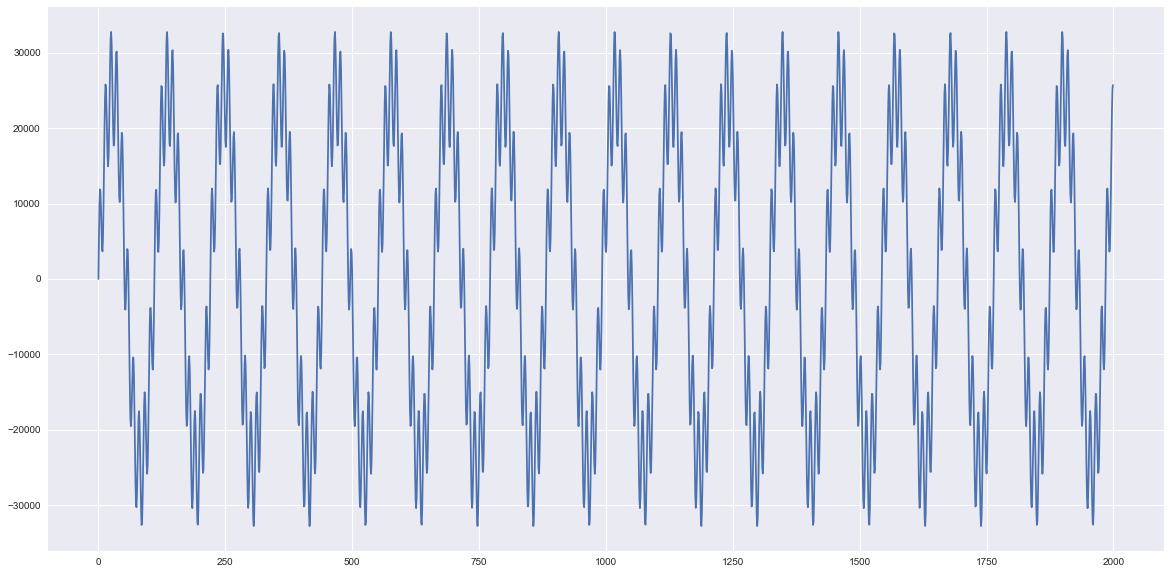

In [66]:
plt.subplots(1, figsize=(20, 10))

SAMPLE_RATE = 44100  # Гц
DURATION = 5  # Секунды

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x * freq
    # 2pi для преобразования в радианы
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Генерируем волну с частотой 2 Гц, которая длится 5 секунд
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)

noise_tone = noise_tone * 0.3
mixed_tone = nice_tone + noise_tone

normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:2000])

In [133]:
from scipy.io.wavfile import write

write("mysinewave.wav", SAMPLE_RATE, mixed_tone)

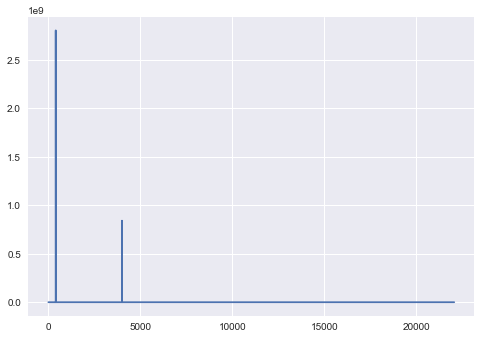

In [124]:
N = SAMPLE_RATE * DURATION

yf = sp.fft.rfft(normalized_tone)
xf = sp.fft.rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))

In [127]:
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

noise_idx = int(points_per_freq * 4000)

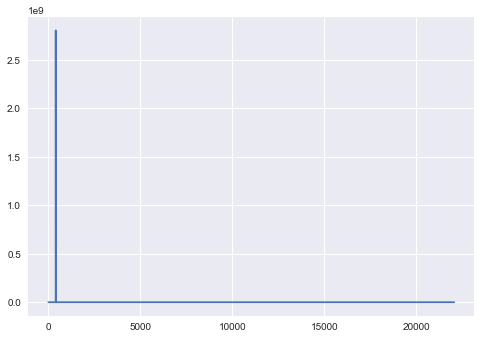

In [131]:
yf[noise_idx] = 0

plt.plot(xf, np.abs(yf))

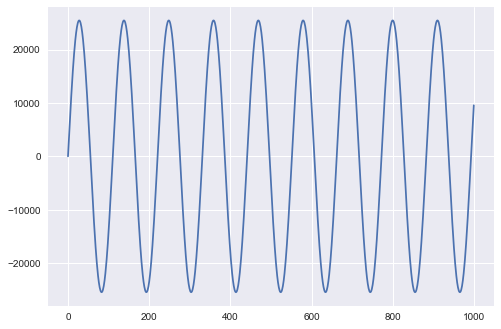

In [135]:
new_sig = sp.fft.irfft(yf)

plt.plot(new_sig[:1000])

write("sin_clean.wav", SAMPLE_RATE, new_sig)

C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


10

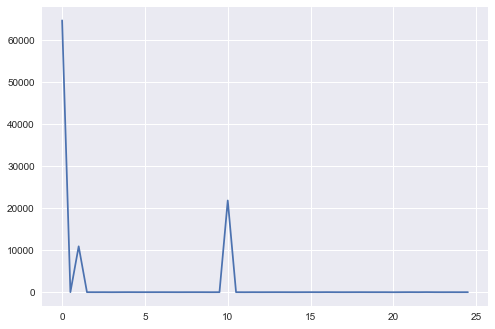

In [265]:
N = signal.size
signal = np.uint8(signal)

yf = sp.fft.rfft(signal)
xf = sp.fft.rfftfreq(N, 1 / 256)

workYF = np.abs(yf)

result = np.where(np.isin(workYF, sorted(workYF)[-3:]))

result = xf[result]
result = result[(result != 0) & (result != 1)]

int(result)